In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pyforest
import warnings
warnings.filterwarnings('ignore')

## Read in Datasets

In [2]:
Accidents = pd.read_csv('Accidents2019.csv', dtype={'variable_ID': int})
Casualties = pd.read_csv('Casualties2019.csv', dtype={'variable_ID': int})
Vehicles = pd.read_csv('Vehicles2019.csv', dtype={'variable_ID': int})
var_lookup = pd.read_excel('variable lookup.xls', sheet_name=None)

cas_lkup= pd.read_csv('cas_adjustment_lookup_2019.csv')

/var/folders/rg/lp_l01pj5c1c2s22v2fm03bc0000gn/T/ipykernel_33887/2108665522.py:1: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  Accidents = pd.read_csv('Road Safety Data - Accidents 2019.csv', dtype={'variable_ID': int})
/var/folders/rg/lp_l01pj5c1c2s22v2fm03bc0000gn/T/ipykernel_33887/2108665522.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Casualties = pd.read_csv('Road Safety Data - Casualties 2019.csv', dtype={'variable_ID': int})
/var/folders/rg/lp_l01pj5c1c2s22v2fm03bc0000gn/T/ipykernel_33887/2108665522.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Vehicles = pd.read_csv('Road Safety Data- Vehicles 2019.csv', dtype={'variable_ID': int})


In [3]:
Accidents.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546
5,2019010155195,540188.0,185266.0,0.020461,51.548879,1,3,2,3,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01003544
6,2019010155196,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,01/01/2019,...,0,5,4,1,1,0,0,1,1,E01001043
7,2019010155198,532773.0,178460.0,-0.088978,51.489509,1,3,3,5,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01003972
8,2019010155206,548535.0,188113.0,0.141957,51.572326,1,3,2,1,01/01/2019,...,0,5,4,1,1,0,0,1,1,E01000031
9,2019010155207,522267.0,168185.0,-0.243769,51.399529,1,3,3,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01003469


In [4]:
Casualties.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [5]:
Vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


### Make a copy of original datasets and read it in

In [6]:
Accidents_19 = Accidents.copy(deep=True)
Casualties_19= Casualties.copy(deep=True)
Vehicles_19 = Vehicles.copy(deep=True)

In [7]:
Accidents_19.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [8]:
Casualties_19.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [9]:
Vehicles_19.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [10]:
all_data = [Accidents_19, Casualties_19, Vehicles_19]
for data in all_data:
    display(data.head())

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [11]:
for data in all_data:
    display(data.shape)

(117536, 32)

(153158, 16)

(216381, 23)

## Checking the Data

In [12]:
for data in all_data: 
    data.info()
    print(data.isnull().sum().sort_values(ascending=False))
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [13]:
Accidents_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [14]:
Casualties_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [15]:
Vehicles_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

## Cleaning

'''
Accidents_19
Casualties_19
Vehicles_19
'''

In [16]:
Accidents_19.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [17]:
Casualties_19.isnull().sum().sum()

0

In [18]:
Vehicles_19.isnull().sum().sum()

0

In [19]:
Accidents_19[Accidents_19.isnull().any(1)] 

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
578,2019010157254,533599.0,193819.0,-0.071257,51.627336,1,3,2,1,13/01/2019,...,0,0,7,1,2,0,0,1,3,E01001461
582,2019010157270,534633.0,181247.0,-0.061140,51.514114,1,3,2,1,10/01/2019,...,-1,1,1,8,1,0,0,1,3,E01004304
2326,2019010162544,529616.0,180782.0,-0.133571,51.511108,1,3,1,1,10/02/2019,...,0,0,4,5,2,0,0,1,1,E01004763
2417,2019010162834,528247.0,174040.0,-0.155733,51.450830,1,3,2,1,10/02/2019,...,-1,-1,4,5,2,-1,-1,1,3,E01004479
2570,2019010163302,526839.0,182474.0,-0.172958,51.526944,1,3,2,1,14/02/2019,...,0,0,4,1,1,0,0,1,1,E01004725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,2,2,NaN
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,0,0,1,1,1,0,0,2,2,NaN


##### Replaced all NaN values with -9999

In [20]:
Accidents_19=Accidents_19.fillna(-9999)

In [21]:
Accidents_19[Accidents_19.isnull().any(1)]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location


In [22]:
Accidents_19["Time"].value_counts()

17:00    1139
17:30    1035
16:00     997
16:30     992
18:00     986
         ... 
04:43       3
04:39       3
04:31       2
03:49       2
04:24       1
Name: Time, Length: 1440, dtype: int64

In [23]:
Accidents_19["Time"].mode()[0]

'17:00'

In [24]:
Accidents_19["Time"] = Accidents_19["Time"].fillna(Accidents_19["Time"].mode()[0])

## Accidents

In [25]:
from datetime import datetime
# df['converted_time'] = pd.DatetimeIndex(df['Time'])
# df['decimal_time'] = time.hour + time.minute/60.
time = Accidents_19['Time']
Accidents_19['converted_time'] = pd.DatetimeIndex(Accidents_19['Time'])
Accidents_19['decimal_time'] = Accidents_19['converted_time'].dt.hour + Accidents_19['converted_time'].dt.minute/60.

In [27]:
Accidents_19.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,converted_time,decimal_time
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,1,1,1,0,0,1,3,E01004762,2022-05-12 17:50:00,17.833333
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,4,1,1,0,0,1,3,E01003117,2022-05-12 21:45:00,21.750000
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,4,1,1,0,0,1,1,E01000943,2022-05-12 01:50:00,1.833333
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,4,1,1,0,0,1,1,E01000973,2022-05-12 01:20:00,1.333333
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,4,1,1,0,0,1,1,E01000546,2022-05-12 00:40:00,0.666667


In [28]:
Accidents_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117536 non-null  object        
 1   Location_Easting_OSGR                        117536 non-null  float64       
 2   Location_Northing_OSGR                       117536 non-null  float64       
 3   Longitude                                    117536 non-null  float64       
 4   Latitude                                     117536 non-null  float64       
 5   Police_Force                                 117536 non-null  int64         
 6   Accident_Severity                            117536 non-null  int64         
 7   Number_of_Vehicles                           117536 non-null  int64         
 8   Number_of_Casualties                         117536 non-null  in

## Questions

1. **(a) Are there significant hours of the day, and days of the week, on which accidents occur?**

In [44]:
decimal_time = Accidents_19["decimal_time"]
decimal_time = pd.DataFrame(decimal_time)
decimal_time = pd.DataFrame(decimal_time.value_counts().sort_index()).reset_index()
decimal_time.columns = ["decimal_time", "Accidents"]
decimal_time

,decimal_time,Accidents
0,0.016667,162
1,0.033333,21
2,0.050000,28
3,0.066667,28
4,0.083333,71
...,...,...
1434,23.916667,68
1435,23.933333,17
1436,23.950000,20
1437,23.966667,19


In [35]:
hours = time.str.split(":").str.get(0)
hours = pd.DataFrame(hours)
hours = pd.DataFrame(hours.value_counts().sort_index()).reset_index()
hours.columns = ["Hours", "Accidents"]
hours

,Hours,Accidents
0,00,1830
1,01,1327
2,02,966
3,03,827
4,04,791
5,05,1169
6,06,2404
7,07,5353
8,08,8127
9,09,5497


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

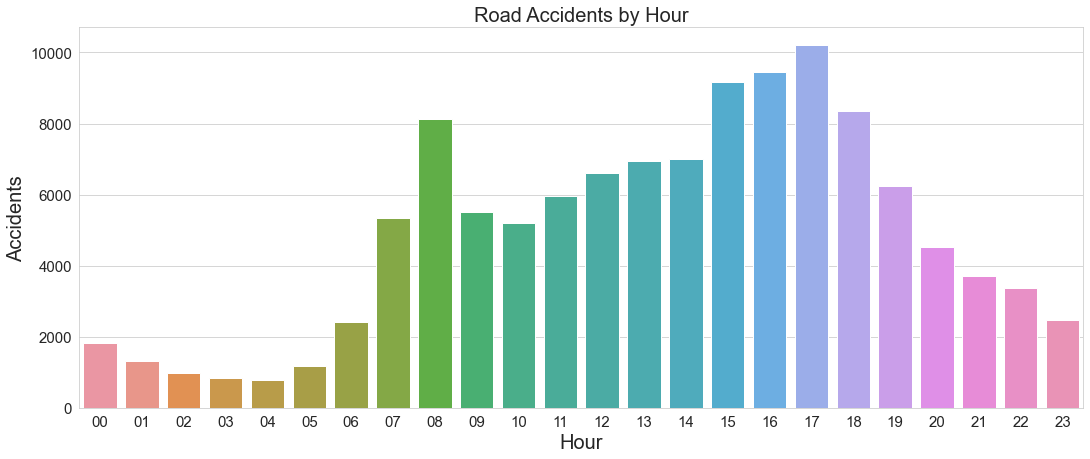

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize = (18, 7))
sns.barplot(x = "Hours", y = "Accidents", data = hours)
plt.title("Road Accidents by Hour", size = 20)
plt.xlabel("Hour", size = 20)
plt.ylabel("Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RdAcHr.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/luch/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

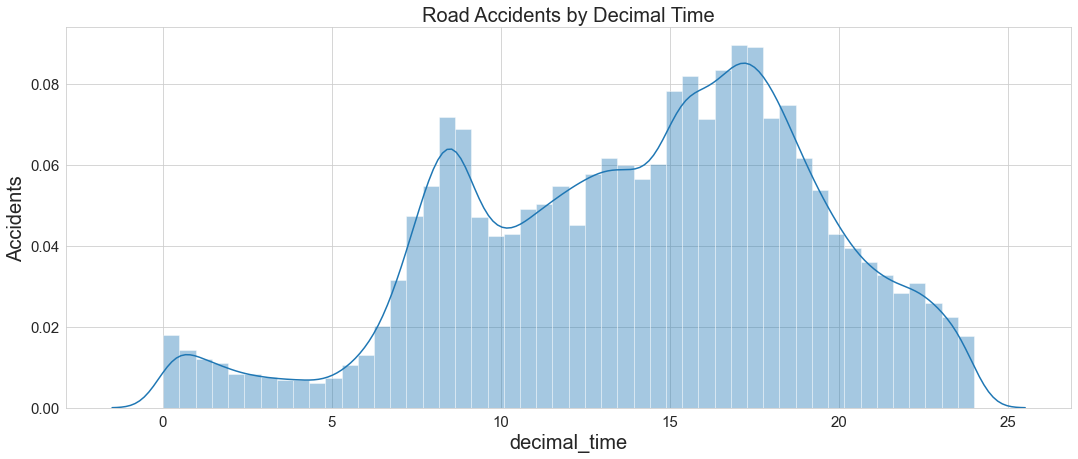

In [45]:
plt.figure(figsize = (18, 7))
sns.distplot(Accidents_19['decimal_time'], kde = True)
plt.title("Road Accidents by Decimal Time", size = 20)
plt.xlabel("decimal_time", size = 20)
plt.ylabel("Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RdAcctime.png")
plt.show()

### Observation
* Peak time in the morning starts at 7am, with the hightest peak at 8:00am, which is when most accidents occur. There is another pick in the afternoon - evening statrting at 15:00 to about 19:00, with the highest peak at 17:00pm which is when most accidents occur. This would be the result of people going and returning from their daily activities, such as work, and school runs. 

**(b) Accidents Occur by Days of Week**

In [50]:
Accidents_19.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,converted_time,decimal_time
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,1,1,1,0,0,1,3,E01004762,2022-05-12 17:50:00,17.833333
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,4,1,1,0,0,1,3,E01003117,2022-05-12 21:45:00,21.750000
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,4,1,1,0,0,1,1,E01000943,2022-05-12 01:50:00,1.833333
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,4,1,1,0,0,1,1,E01000973,2022-05-12 01:20:00,1.333333
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,4,1,1,0,0,1,1,E01000546,2022-05-12 00:40:00,0.666667


In [52]:
Accidents_19['Day_of_Week'].head()

0    2
1    3
2    3
3    3
4    3
Name: Day_of_Week, dtype: int64

In [51]:
Accidents_19['Date'].head()

0    18/02/2019
1    15/01/2019
2    01/01/2019
3    01/01/2019
4    01/01/2019
Name: Date, dtype: object

In [55]:
week_day = Accidents_19["Day_of_Week"].value_counts().sort_index().to_frame().reset_index()
week_day.columns = ["Day of Week", "Accidents"]
week_day

,Day of Week,Accidents
0,1,12935
1,2,16643
2,3,17598
3,4,17775
4,5,17973
5,6,19056
6,7,15556


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

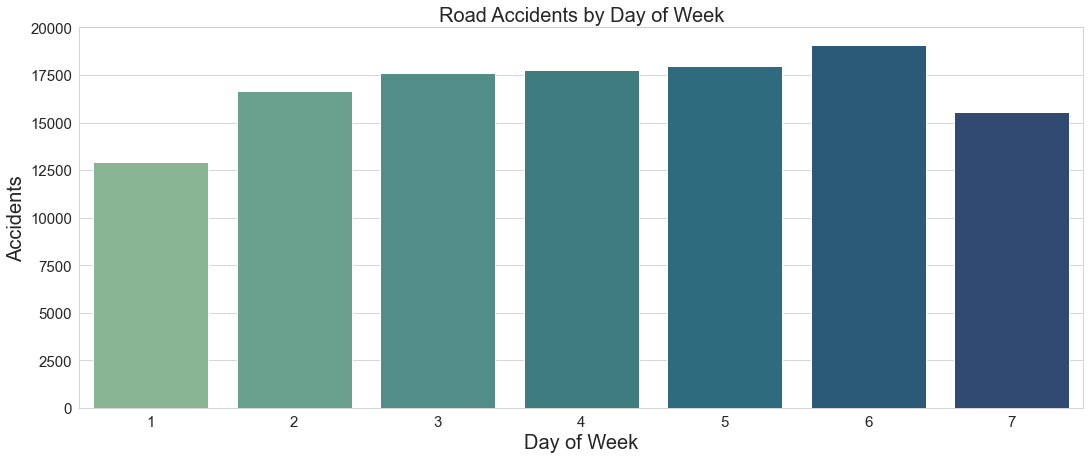

In [108]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Day of Week", y = "Accidents", data = week_day, palette = "crest")
plt.title("Road Accidents by Day of Week", size = 20)
plt.xlabel("Day of Week", size = 20)
plt.ylabel("Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RdAccWD.png")
plt.show()

6    19056
5    17973
4    17775
3    17598
2    16643
7    15556
1    12935
Name: Day_of_Week, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/luch/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

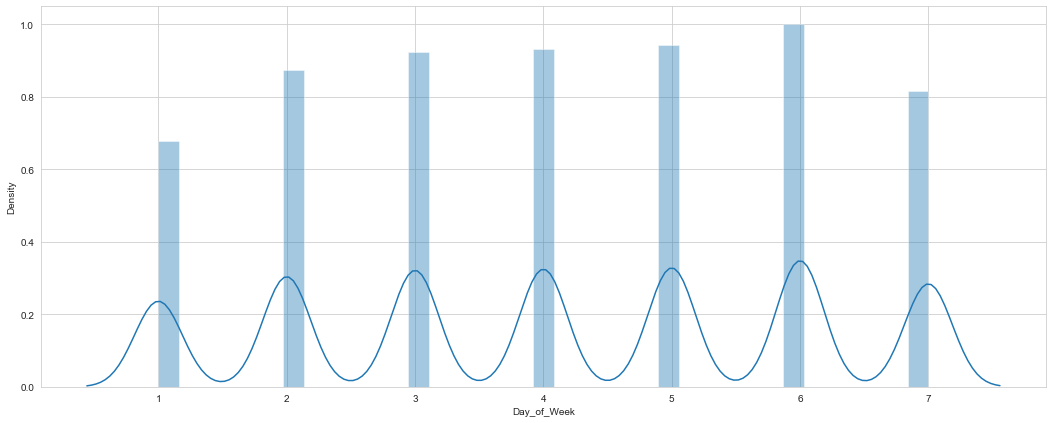

In [109]:
print(Accidents_19['Day_of_Week'].value_counts())
plt.figure(figsize = (18, 7))
sns.distplot(Accidents_19['Day_of_Week'])
plt.show()

### Observation
* There seem to be more accidents on Saturday. The day with the least accidents is Monday.